In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

df=pd.read_csv(r'C:\Users\TajwarAbtahee\OneDrive - JCW Resourcing\Desktop\Python\practice\London Housing Data.csv')
df.head()

date            area  average_price       code  houses_sold  \
0  1/1/1995  city of london          91449  E09000001         17.0   
1  2/1/1995  city of london          82203  E09000001          7.0   
2  3/1/1995  city of london          79121  E09000001         14.0   
3  4/1/1995  city of london          77101  E09000001          7.0   
4  5/1/1995  city of london          84409  E09000001         10.0   

   no_of_crimes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [25]:
df.date=pd.to_datetime(df.date)

In [26]:
#monthly average house price
df['month']=df.date.dt.strftime('%Y-%m')
df.head()

date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london          91449  E09000001         17.0   
1 1995-02-01  city of london          82203  E09000001          7.0   
2 1995-03-01  city of london          79121  E09000001         14.0   
3 1995-04-01  city of london          77101  E09000001          7.0   
4 1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes    month  
0           NaN  1995-01  
1           NaN  1995-02  
2           NaN  1995-03  
3           NaN  1995-04  
4           NaN  1995-05

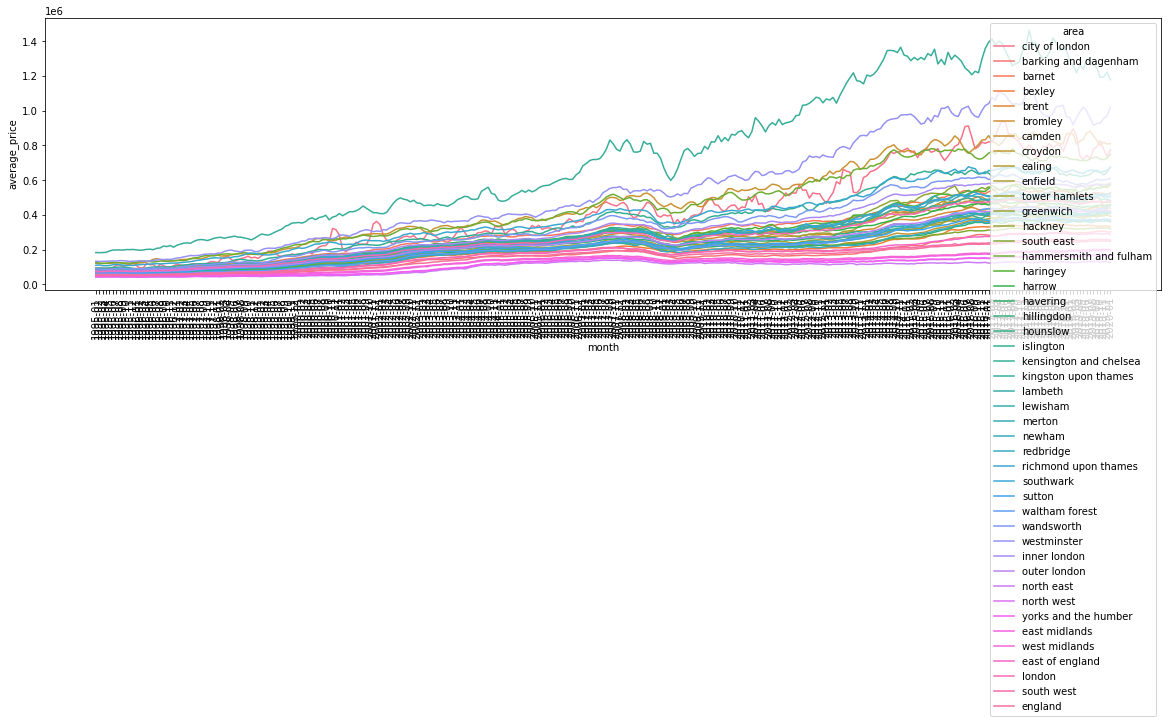

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x=df.month,y=df.average_price,hue=df.area)
plt.xticks(rotation=90)
plt.show()

#seaborn makes data look messy

In [31]:
#plotly handles data with large amounts of variables much better
fig = px.line(df, x="month", y="average_price", color='area',title='Average house price over time')
fig.show()

In [41]:
#yearly number of houses sold
df['year']=df.date.dt.year
df.groupby('year').sum().houses_sold.to_frame()

houses_sold
year             
1995    1716954.0
1996    2086378.0
1997    2370056.0
1998    2273358.0
1999    2597008.0
2000    2415180.0
2001    2661822.0
2002    2875300.0
2003    2653878.0
2004    2712216.0
2005    2269336.0
2006    2841060.0
2007    2727506.0
2008    1377018.0
2009    1328088.0
2010    1436870.0
2011    1430736.0
2012    1456790.0
2013    1744080.0
2014    2046326.0
2015    2023310.0
2016    1988838.0
2017    1944956.0
2018    1844249.0
2019    1572378.0
2020          0.0

<AxesSubplot:xlabel='year'>

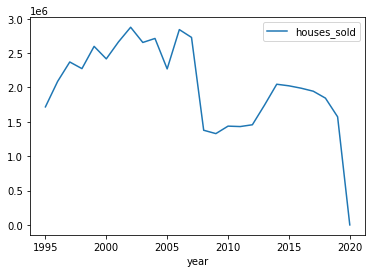

In [42]:
df.groupby('year').sum().houses_sold.to_frame().plot(kind='line')

In [44]:
#monthly crimes committed
df['month2']=df.date.dt.month
df

date            area  average_price       code  houses_sold  \
0     1995-01-01  city of london          91449  E09000001         17.0   
1     1995-02-01  city of london          82203  E09000001          7.0   
2     1995-03-01  city of london          79121  E09000001         14.0   
3     1995-04-01  city of london          77101  E09000001          7.0   
4     1995-05-01  city of london          84409  E09000001         10.0   
...          ...             ...            ...        ...          ...   
13544 2019-09-01         england         249942  E92000001      64605.0   
13545 2019-10-01         england         249376  E92000001      68677.0   
13546 2019-11-01         england         248515  E92000001      67814.0   
13547 2019-12-01         england         250410  E92000001          NaN   
13548 2020-01-01         england         247355  E92000001          NaN   

       no_of_crimes    month  year  month2  
0               NaN  1995-01  1995       1  
1               NaN  1995-02  1995       2  
2               NaN  1995-03  1995       3  
3               NaN  1995-04  1995       4  
4               NaN  1995-05  1995       5  
...             ...      ...   ...     ...  
13544           NaN  2019-09  2019       9  
13545           NaN  2019-10  2019      10  
13546           NaN  2019-11  2019      11  
13547           NaN  2019-12  2019      12  
13548           NaN  2020-01  2020       1  

[13549 rows x 9 columns]

In [56]:
monthly_crime=df.groupby('month2').sum().no_of_crimes.to_frame()
monthly_crime.style.background_gradient(cmap='RdYlGn_r')
#February and December have lower than average crimes compared to the rest of the year
#January and July are the worst months for crime

(1200000.0, 1400000.0)

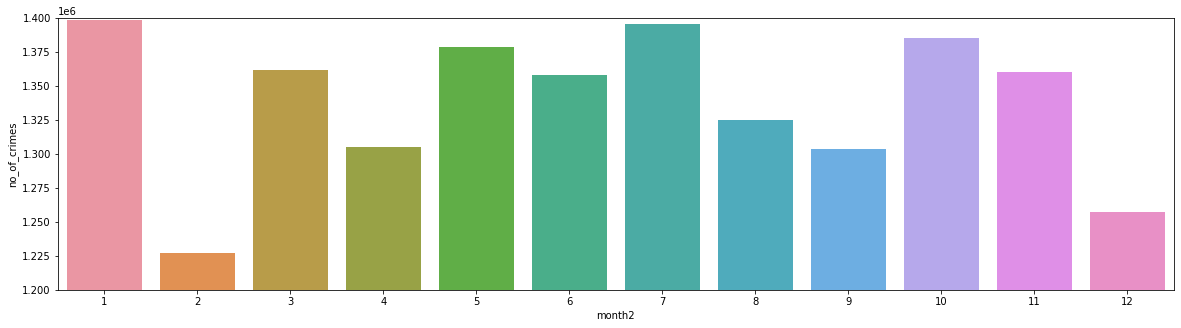

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(data=monthly_crime,x=monthly_crime.index,y=monthly_crime.no_of_crimes)
plt.ylim(1200000,1400000)

In [67]:
ac=df.groupby('area').sum().no_of_crimes.reset_index().sort_values('no_of_crimes',ascending=False).head(5)
ac

area  no_of_crimes
43  westminster     1211743.0
25      lambeth      719454.0
5        camden      699955.0
37    southwark      693541.0
29       newham      652978.0

In [74]:
px.bar(ac,x='area',y='no_of_crimes',text_auto='.2s') #top 5 boroughs with crime

In [75]:
px.bar(ac,x='area',y='no_of_crimes',text='no_of_crimes') #alternative way if exact crime number is needed on data labels

In [76]:
df.head()

date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london          91449  E09000001         17.0   
1 1995-02-01  city of london          82203  E09000001          7.0   
2 1995-03-01  city of london          79121  E09000001         14.0   
3 1995-04-01  city of london          77101  E09000001          7.0   
4 1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes    month  year  month2  
0           NaN  1995-01  1995       1  
1           NaN  1995-02  1995       2  
2           NaN  1995-03  1995       3  
3           NaN  1995-04  1995       4  
4           NaN  1995-05  1995       5

In [86]:
scat=df.groupby('year').sum().no_of_crimes.reset_index().iloc[6:25] #no. of crime by year, prior to 2001 is removed as crime was 0
scat

year  no_of_crimes
6   2001      952463.0
7   2002      978918.0
8   2003      961068.0
9   2004      943155.0
10  2005      895371.0
11  2006      878502.0
12  2007      841080.0
13  2008      822931.0
14  2009      806394.0
15  2010      816823.0
16  2011      813903.0
17  2012      788327.0
18  2013      708491.0
19  2014      699872.0
20  2015      733012.0
21  2016      760609.0
22  2017      824620.0
23  2018      838365.0
24  2019      916420.0

In [87]:
px.line(scat,x='year',y='no_of_crimes') #crime was at peak in 2002 and decined until 2004 but then began to rise again

In [98]:
px.scatter(df,x='average_price',y='houses_sold',trendline='ols',color='area') #there is a negative correllation between average prices and houses sold

In [96]:
df.houses_sold.corr(df.average_price)

-0.16825558343290362

In [101]:
#lets have a look at the same measure without 'england'

not_en=df[df.area !='england']
px.scatter(not_en,x='average_price',y='houses_sold',trendline='ols',color='area')

In [106]:
mostsold=not_en.groupby('area').sum().houses_sold.reset_index().sort_values('houses_sold',ascending=False)
mostsold

area  houses_sold
34              south east    4195116.0
26                  london    3134378.0
30              north west    2895280.0
10         east of england    2809800.0
35              south west    2639661.0
43    yorks and the humber    2183762.0
41           west midlands    2128978.0
9            east midlands    2033724.0
31            outer london    1897009.0
20            inner london    1233831.0
29              north east    1033675.0
40              wandsworth     163871.0
4                  bromley     148516.0
7                  croydon     145906.0
1                   barnet     133648.0
24                 lambeth     117953.0
11                 enfield     115249.0
8                   ealing     110042.0
25                lewisham     108123.0
42             westminster     106694.0
18              hillingdon     104721.0
32               redbridge     102511.0
38           tower hamlets     101857.0
36               southwark      99714.0
2                   bexley      97351.0
33    richmond upon thames      97074.0
17                havering      95135.0
12               greenwich      94126.0
39          waltham forest      92938.0
37                  sutton      91399.0
27                  merton      87262.0
28                  newham      86236.0
19                hounslow      85472.0
3                    brent      81613.0
15                haringey      81162.0
16                  harrow      78921.0
22  kensington and chelsea      77128.0
23    kingston upon thames      75627.0
14  hammersmith and fulham      75518.0
5                   camden      74362.0
21               islington      68271.0
13                 hackney      65356.0
0     barking and dagenham      59498.0
6           city of london       7586.0

In [108]:
px.bar(mostsold,x='area',y='houses_sold', text_auto='.1s') # as we can see it is highly evident that houses within London as far less sold compared to the rest of the country

In [121]:
px.box(df,x='average_price',color='area') 

In [122]:
px.box(df,x='average_price') #londons house prices are causing outliers